In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA/data_80.csv")

<ipython-input-2-d8845466f746>:1: DtypeWarning: Columns (0,1,9,10,12,24,26,28,30,38,42,49,51,52,53,54,55,56,60,61,74,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/DATA/data_80.csv")


In [ ]:
df.head(5)

,mdr_report_key,device_sequence_no,date_received,brand_name,generic_name,manufacturer_d_name,manufacturer_d_address_1,manufacturer_d_city,manufacturer_d_state_code,manufacturer_d_zip_code,...,source_type,date_added,date_changed,reporter_country_code,pma_pmn_num,summary_report,noe_summarized,suppl_dates_fda_received,suppl_dates_mfr_received,date_report_year
0,18423440,1,2024-01-02,MINIMED 700 CHINA BLE CONNECT 3.0 MMOL/L,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
1,18423440,1,2024-01-02,MINIMED 700 CHINA BLE CONNECT 3.0 MMOL/L,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
2,18423440,1,2024-01-02,MINIMED 700 CHINA BLE CONNECT 3.0 MMOL/L,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
3,18424891,1,2024-01-02,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
4,18424891,1,2024-01-02,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN


In [ ]:
df['device_sequence_no'].value_counts()

,count
device_sequence_no,
1,1989865
1,24570
2,124
0,65
3,56
4,38
5,26
6,14
7,11


In [ ]:
df['device_sequence_no'] = df['device_sequence_no'].astype(str).str.strip()


In [ ]:
mask_header = df['device_sequence_no'].str.lower() == 'device_sequence_no'
df = df.loc[~mask_header]

In [ ]:
df['device_sequence_no'] = pd.to_numeric(df['device_sequence_no'], errors='coerce')

In [ ]:
df = df.dropna(subset=['device_sequence_no'])

In [ ]:
df['device_sequence_no'] = df['device_sequence_no'].astype(int)

In [ ]:
df['device_sequence_no'].value_counts()

,count
device_sequence_no,
1,2014435
2,124
0,65
3,56
4,39
5,26
6,14
7,11
8,4


In [ ]:
df['date_received'].value_counts()

,count
date_received,
2021-03-17,12457
2021-03-19,12442
2021-03-18,12007
2021-03-12,11893
2021-03-23,11840
...,...
2019-06-16,2
2022-01-14,2
2020-06-27,2


In [ ]:
df.loc[:, 'date_received'] = df.loc[:, 'date_received'] \
                                  .astype(str) \
                                  .str.strip()

In [ ]:
df.loc[:, 'date_received'] = pd.to_datetime(
    df.loc[:, 'date_received'],
    errors='coerce'
)

In [ ]:
df = df.dropna(subset=['date_received'])

In [ ]:
df['date_received'] = pd.to_datetime(
    df['date_received'],
    errors='coerce'
)

In [ ]:
print(df['date_received'].dtype)


datetime64[ns]


In [ ]:
df['date_received'].value_counts()

,count
date_received,
2021-03-17,12457
2021-03-19,12442
2021-03-18,12007
2021-03-12,11893
2021-03-23,11840
...,...
2019-06-16,2
2022-01-14,2
2020-06-27,2


In [ ]:
df['brand_name'].value_counts()

,count
brand_name,
DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,1255460
DEXCOM G5 MOBILE CONTINUOUS GLUCOSE MONITORING SYSTEM,153758
LIBRE SENSOR FREESTYLE,125326
T:SLIM G5 SYSTEM,49729
LIBRE 2 SENSOR FREESTYLE,42108
...,...
ONE TOUCH DELICA LANCING DEVICE,1
ONE TOUCH VERIO STRIPS 100'S,1
FREESTYLE LIBRE PRO CGM,1


In [ ]:

df.loc[:, 'brand_name'] = (
    df.loc[:, 'brand_name']
      .astype(str)
      .str.strip()
      .str.lower()
)

In [ ]:
df.loc[:, 'brand_name'] = df.loc[:, 'brand_name'] \
    .str.replace(r'[^a-z0-9\s]', '', regex=True)

In [ ]:
df.loc[:, 'brand_name'] = df.loc[:, 'brand_name'] \
    .str.replace(r'\s+', ' ', regex=True)


In [ ]:
df['brand_name'].value_counts()

,count
brand_name,
dexcom g6 continuous glucose monitoring system,1260384
dexcom g5 mobile continuous glucose monitoring system,153760
libre sensor freestyle,125326
tslim g5 system,49731
libre 2 sensor freestyle,42108
...,...
one touch ultrasmart meter,1
continuous glucose monitor cgm g6,1
ble smart blood glucose monitoring system,1


In [ ]:
df['brand_name'].isna().any()


np.False_

In [ ]:
df.head(10)

,mdr_report_key,device_sequence_no,date_received,brand_name,generic_name,manufacturer_d_name,manufacturer_d_address_1,manufacturer_d_city,manufacturer_d_state_code,manufacturer_d_zip_code,...,source_type,date_added,date_changed,reporter_country_code,pma_pmn_num,summary_report,noe_summarized,suppl_dates_fda_received,suppl_dates_mfr_received,date_report_year
0,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
1,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
2,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
3,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
4,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
5,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
6,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
7,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
8,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
9,18433218,1,2024-01-03,paradigm realtime revel insulin infusion pump ...,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC PUERTO RICO OPERATIONS CO.,CEIBA NORTE IND. PARK #50 ROAD,JUNCOS,NaN,00777,...,04,2024-01-03,2025-01-02,US,P150019,N,1.0,2025-01-02,2024-12-06,NaN


In [ ]:
df.to_csv('/content/drive/MyDrive/DATA/cleaned_data.csv',index = False)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA/cleaned_data.csv')

<ipython-input-1-38ed6a78a678>:2: DtypeWarning: Columns (9,10,12,38,42,49,51,55,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DATA/cleaned_data.csv')


In [ ]:
df.head(5)

,mdr_report_key,device_sequence_no,date_received,brand_name,generic_name,manufacturer_d_name,manufacturer_d_address_1,manufacturer_d_city,manufacturer_d_state_code,manufacturer_d_zip_code,...,source_type,date_added,date_changed,reporter_country_code,pma_pmn_num,summary_report,noe_summarized,suppl_dates_fda_received,suppl_dates_mfr_received,date_report_year
0,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
1,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
2,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
3,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
4,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN


In [ ]:
df['brand_name'] = df['brand_name'].fillna('unknown')

In [ ]:
df['brand_name'].isna().any()

np.False_

In [ ]:
df['generic_name'].value_counts()

,count
generic_name,
CONTINUOUS GLUCOSE MONITOR,1477107
FLASH GLUCOSE MONITORING SYSTEM,224540
"PUMP, INFUSION, INSULIN, TO BE USED WITH INVASIVE GLUCOSE SENSOR",218981
BLOOD GLUCOSE MONITORING SYSTEM,58276
"PUMP, INFUSION, INSULIN, TO BE USED WITH INVASIVE GLUCOSE SENSOR",6922
...,...
"CONTINUOUS, GLUCOSE MONITOR RETROSPECTIVE DATA ANALYSIS SOFTWARE",1
"INTEGRATED CONTINUOS GLUCOSE MONITORING SYSTEM, FACTORY CALIBRATED",1
"INTEGRATED CONTINUOUS GLUCOSE MONITORING, SYSTEM, FACTORY CALIBRATED",1


In [ ]:
df['generic_name'] = df['generic_name'].fillna('unknown')

In [ ]:
df['generic_name'] = (
    df['generic_name']
      .astype(str)
      .str.strip()
      .str.lower()
)

In [ ]:
df['generic_name'] = df['generic_name'] \
    .str.replace(r'[^a-z0-9\s]', ' ', regex=True)

In [ ]:
df['generic_name'].isna().any()

np.False_

In [ ]:
df.head(5)

,mdr_report_key,device_sequence_no,date_received,brand_name,generic_name,manufacturer_d_name,manufacturer_d_address_1,manufacturer_d_city,manufacturer_d_state_code,manufacturer_d_zip_code,...,source_type,date_added,date_changed,reporter_country_code,pma_pmn_num,summary_report,noe_summarized,suppl_dates_fda_received,suppl_dates_mfr_received,date_report_year
0,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
1,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
2,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,MEDTRONIC-CHENGDU,NaN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
3,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
4,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,"DEXCOM, INC.",6340 SEQUENCE DR.,SAN DIEGO,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN


In [ ]:
df['manufacturer_d_name'].value_counts()

,count
manufacturer_d_name,
"DEXCOM, INC.",1438392
ABBOTT DIABETES CARE INC,279678
MEDTRONIC PUERTO RICO OPERATIONS CO.,185158
TANDEM DIABETES CARE,60191
MEDTRONIC MINIMED,19118
...,...
ABBOTT LABORATORIES / ABBOTT DIABETES CARE INC.,1
"MEDLINE INDUSTRIES, INC.",1
"PHILOSYS CO., LTD.",1


In [ ]:
df['manufacturer_d_name'].nunique()

101

In [ ]:
df['manufacturer_d_name'].isna().sum()

np.int64(102)

In [ ]:
df['manufacturer_d_name'] = df['manufacturer_d_name'].fillna('unknown')

In [ ]:
# work in‑place
df['manufacturer_d_name'] = (
    df['manufacturer_d_name']
      .astype(str)
      .str.strip()
      .str.lower()
)

In [ ]:
# remove commas, periods
df['manufacturer_d_name'] = df['manufacturer_d_name'] \
  .str.replace(r'[.,]', '', regex=True)

# drop common suffixes at end of string
df['manufacturer_d_name'] = df['manufacturer_d_name'] \
  .str.replace(
    r'\b(inc|incorporated|co|company|ltd|corp|corporation|llc)\b',
    '',
    regex=True
  ) \
  .str.strip()

In [ ]:
df['manufacturer_d_name'].nunique()

68

In [ ]:
df['manufacturer_d_address_1'].unique()

array([nan, '6340 SEQUENCE DR.', 'CEIBA NORTE IND. PARK #50 ROAD',
       '1360 SOUTH LOOP ROAD', 'RANGE ROAD', '9115 HAGUE ROAD',
       '2400 NW 55TH COURT', '20451 SENECA MEADOWS PARKWAY',
       '18000 DEVONSHIRE ST.', '6340 SEQUENCE DRIVE',
       '11075 ROSELLE STREET', '100 SUMMIT LAKE DRIVE', 'UNK',
       'GUBELSTRASSE 34', '150 W. EVELYN AVE', '1380 SOUTH LOOP ROAD',
       'NO.91, SEC. 2', '200 PROSPECT STREET', 'NO. 7 II-HSIN ROAD V',
       'NO. 91, SEC 2', 'NO.7 LI-HSIN ROAD V', '200 PROSPECT ST',
       '43, BANPO-DAERO, 28-GIL', '3500 WEST WARREN AVE',
       '7C RAYMOND AVE', '43, BANPO-DAERO 28-GIL', '1360 SOUTH LOOP RD.',
       '5F., NO. 16, 18, 20, 22,', 'NO. 91, SEC. 2', '6340 SEQUENCE DR',
       '20 VALLEY STREAM PKWY', 'NO.8 R&D RD.III',
       '3962 POINT OF ROCKS RD', '2660 TOWNSGATE RD. STE. 300',
       '1480 KOJI KONAN-CHO', '13OP ROAD60 SOUTH LO',
       '1480 KOJI-KONAN-CHO', 'NO.8 R&D 3ND RD.,', '39 MANNING RD',
       '28-5'], dtype=object)

In [ ]:
df['manufacturer_d_address_1'] = df['manufacturer_d_address_1'].fillna('unknown')

In [ ]:
df['manufacturer_d_address_1'] = (
    df['manufacturer_d_address_1']
      .astype(str)
      .str.upper()
      .str.strip()
)

In [ ]:
df['manufacturer_d_address_1'] = df['manufacturer_d_address_1'] \
    .str.replace(r"[^A-Z0-9,\.\-/\s]", "", regex=True)

In [ ]:
df['manufacturer_d_address_1'] = df['manufacturer_d_address_1'] \
    .str.replace(r"\s+", " ", regex=True) \
    .str.strip()

In [ ]:
df.head(5)

,mdr_report_key,device_sequence_no,date_received,brand_name,generic_name,manufacturer_d_name,manufacturer_d_address_1,manufacturer_d_city,manufacturer_d_state_code,manufacturer_d_zip_code,...,source_type,date_added,date_changed,reporter_country_code,pma_pmn_num,summary_report,noe_summarized,suppl_dates_fda_received,suppl_dates_mfr_received,date_report_year
0,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
1,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
2,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,NaN,NaN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
3,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,SAN DIEGO,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
4,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,SAN DIEGO,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN


In [ ]:
df['manufacturer_d_city'].unique()

array(['Unknown', 'San Diego', 'Juncos', 'Alameda', 'Witney',
       'Indianapolis', 'Fort Lauderdale', 'Germantown', 'Northridge',
       'Valhalla', 'Unk', 'Zug', 'Mountain View', 'Hsinchu', 'Waltham',
       'Hsinchu City', 'Hsinchu, Taiwan', 'Seoul', 'Fremont',
       'Seocho-Gu, Seoul', 'Salem', 'Miaoli County, Taiwan',
       'Hsinchu City 30070, Tw', 'Malvern,Pa', 'Malvern', 'San Diego, Ca',
       'Hsinchu, Taiwan 30078', 'Waltham, Ma', 'Germantown,, Md',
       'Valhalla, Ny', 'Seoul 06646', 'Mountain View, Ca',
       'Westlake Village, Ca', 'Koka Shiga, 520-3306', 'Germantown, Md',
       'Koka Shiga', 'Billerica', 'Marlborough', 'Woking, Surrey',
       'Miaoli County', '1360 South Loop Road', 'Valhala', 'Jeollabuk-Do',
       'Hsinchu City 30070', 'Westlake Village'], dtype=object)

In [ ]:
df['manufacturer_d_city'] = df['manufacturer_d_city'].fillna('unknown')

In [ ]:
df['manufacturer_d_city'] = (
    df['manufacturer_d_city']
      .astype(str)
      .str.strip()
      .str.rstrip(',')
      .str.strip()
)

In [ ]:
df['manufacturer_d_city'] = df['manufacturer_d_city'].str.title()


In [ ]:
df['manufacturer_d_city'] = df['manufacturer_d_city'] \
    .str.replace(r'\s+', ' ', regex=True)

In [ ]:
df['manufacturer_d_state_code'].nunique()

10

In [ ]:
df['manufacturer_d_state_code'] = df['manufacturer_d_state_code'].fillna('UNKNOWN')

In [ ]:
df['manufacturer_d_state_code'] = (
    df['manufacturer_d_state_code']
      .astype(str)
      .str.strip()
      .str.upper()
)

In [ ]:
df['manufacturer_d_state_code'].unique()

array(['UNKNOWN', 'CA', 'IN', 'FL', 'MD', 'NY', 'MA', 'NH', 'PA', 'OK',
       'ME'], dtype=object)

In [ ]:
df.head(5)

,mdr_report_key,device_sequence_no,date_received,brand_name,generic_name,manufacturer_d_name,manufacturer_d_address_1,manufacturer_d_city,manufacturer_d_state_code,manufacturer_d_zip_code,...,source_type,date_added,date_changed,reporter_country_code,pma_pmn_num,summary_report,noe_summarized,suppl_dates_fda_received,suppl_dates_mfr_received,date_report_year
0,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,Unknown,UNKNOWN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
1,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,Unknown,UNKNOWN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
2,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,Unknown,UNKNOWN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
3,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
4,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN


In [ ]:
df.to_csv('/content/drive/MyDrive/DATA/cleaned_data.csv',index = False)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA/cleaned_data.csv')

<ipython-input-2-38ed6a78a678>:2: DtypeWarning: Columns (9,10,12,38,42,49,51,55,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DATA/cleaned_data.csv')


In [ ]:
df.head(10)

,mdr_report_key,device_sequence_no,date_received,brand_name,generic_name,manufacturer_d_name,manufacturer_d_address_1,manufacturer_d_city,manufacturer_d_state_code,manufacturer_d_zip_code,...,source_type,date_added,date_changed,reporter_country_code,pma_pmn_num,summary_report,noe_summarized,suppl_dates_fda_received,suppl_dates_mfr_received,date_report_year
0,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,Unknown,UNKNOWN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
1,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,Unknown,UNKNOWN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
2,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,Unknown,UNKNOWN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
3,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
4,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
5,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
6,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
7,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
8,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,92121.0,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
9,18433218,1,2024-01-03,paradigm realtime revel insulin infusion pump ...,pump infusion insulin to be used with invas...,medtronic puerto rico operations,CEIBA NORTE IND. PARK 50 ROAD,Juncos,UNKNOWN,777.0,...,04,2024-01-03,2025-01-02,US,P150019,N,1.0,2025-01-02,2024-12-06,NaN


In [ ]:
df['manufacturer_d_zip_code'].unique()

array([nan, 92121.0, 777.0, 94502.0, 12345.0, 46250.0, 33309.0, 20876.0,
       91325.0, 10595.0, 20875.0, 6300.0, 94041.0, 30070.0, 2454.0,
       30078.0, 6646, 94538.0, 3079.0, 35053.0, 19355.0, 30076.0, 46256.0,
       '92121', '91325', '10595', '00777', '46250', '94502', '20875',
       '33309', '30070', '520-3', '94041', '6300', '94502.0', '777.0',
       30077.0, 1821.0, 94520.0, 20786.0, 1752.0, '20876', 'GU215',
       94580.0, 20781.0, 54172.0, 91361.0], dtype=object)

In [ ]:
df.drop(columns=['manufacturer_d_zip_code'], inplace=True)

In [ ]:
df.head(5)

,mdr_report_key,device_sequence_no,date_received,brand_name,generic_name,manufacturer_d_name,manufacturer_d_address_1,manufacturer_d_city,manufacturer_d_state_code,manufacturer_d_country_code,...,source_type,date_added,date_changed,reporter_country_code,pma_pmn_num,summary_report,noe_summarized,suppl_dates_fda_received,suppl_dates_mfr_received,date_report_year
0,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,Unknown,UNKNOWN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
1,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,Unknown,UNKNOWN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
2,18423440,1,2024-01-02,minimed 700 china ble connect 30 mmoll,pump infusion insulin to be used with invas...,medtronic-chengdu,UNKNOWN,Unknown,UNKNOWN,NaN,...,"01,04",2024-01-02,2025-01-02,CH,EXEMPT,N,1.0,2025-01-02,2024-12-04,NaN
3,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN
4,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,...,"01,08",2024-01-02,2025-01-07,AU,DEN170088,N,1.0,2025-01-07,2024-12-16,NaN


In [ ]:
df.drop(columns=['manufacturer_d_zip_code_ext'], inplace=True)

In [ ]:
df['manufacturer_d_country_code'].value_counts()



,count
manufacturer_d_country_code,
US,1822341
*,44343
SZ,4770
TW,545
UK,489
CH,439
KS,79
JA,23
GM,10


In [ ]:
df['manufacturer_d_country_code'] = (
    df['manufacturer_d_country_code']
      .astype(str)
      .str.strip()
      .str.upper()
)

In [ ]:
df.loc[
    df['manufacturer_d_country_code'].isin(['*','NAN','NONE','']),
    'manufacturer_d_country_code'
] = pd.NA

In [ ]:
df['manufacturer_d_country_code'] = df['manufacturer_d_country_code'].fillna('UNKNOWN')

In [ ]:
df['manufacturer_d_country_code'].value_counts()



,count
manufacturer_d_country_code,
US,1822341
UNKNOWN,186064
SZ,4770
TW,545
UK,489
CH,439
KS,79
JA,23
GM,10


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'manufacturer_d_postal_code',
       'device_operator', 'expiration_date_of_device', 'model_number',
       'catalog_number', 'lot_number', 'device_availability',
       'date_returned_to_manufacturer', 'device_report_product_code',
       'device_age_text', 'device_evaluated_by_manufactur',
       'combination_product_flag', 'udi_di', 'udi_public', 'mdr_text_key',
       'text_type_code', 'patient_sequence_number', 'foi_text', 'unnamed_0',
       'report_number', 'report_source_code', 'manufacturer_link_flag',
       'adverse_event_flag', 'product_problem_flag', 'date_of_event',
       'reprocessed_and_reused_flag', 'reporter_occupation_code',
       'health_professional', 'initial_report_to_fda', 'report_to_fda',
       'event_location', '

In [ ]:
df.drop(columns=['manufacturer_d_postal_code'], inplace=True)

In [ ]:
df['device_operator'].unique()

array(['0LP', 'UNKNOWN', '0HP', '000', 'I', '0'], dtype=object)

In [ ]:
df['device_operator'] = df['device_operator'].fillna('UNKNOWN')

In [ ]:
df['expiration_date_of_device'].unique()

array([datetime.date(2024, 6, 13), datetime.date(2024, 7, 9),
       datetime.date(2024, 12, 31), ..., datetime.date(2018, 7, 2),
       datetime.date(2019, 3, 19), datetime.date(2018, 4, 7)],
      dtype=object)

In [ ]:
df['expiration_date_of_device'] = pd.to_datetime(
    df['expiration_date_of_device'],
    errors='coerce'
)

In [ ]:
df['expiration_date_of_device'] = df['expiration_date_of_device'].dt.date

In [ ]:
df = df.dropna(subset=['expiration_date_of_device'])

In [ ]:
df.to_csv('/content/drive/MyDrive/DATA/cleaned_data.csv',index = False)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DATA/cleaned_data.csv')

<ipython-input-2-ccf62e81d47f>:3: DtypeWarning: Columns (39,48,52,53,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DATA/cleaned_data.csv')


Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'lot_number', 'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag', 'udi_di',
       'udi_public', 'mdr_text_key', 'text_type_code',
       'patient_sequence_number', 'foi_text', 'unnamed_0', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 

In [ ]:
df['model_number'].nunique()

456

In [ ]:
df['model_number'] = df['model_number'].fillna('UNKNOWN')

In [ ]:
df['model_number'] = (
    df['model_number']
      .astype(str)
      .str.strip()
      .str.upper()
)

In [ ]:
df['model_number'] = df['model_number'].str.replace('\xa0', ' ', regex=False)

In [ ]:
df['model_number'] = (
    df['model_number']
      .str.replace(r'\s+', ' ', regex=True)
      .str.strip(' ,.-')
)

In [ ]:
df['catalog_number'].unique()

array(['STT-GS-009', 'STP-AT-012', 'STP-GT-002', 'STT-GS-003',
       'STT-OM-001', nan, 'STP-AT-013', 'STP-AT-011', 'STT-OR-001',
       'STT-GS-006', 'STT-OE-002', 'STT-GS-016', 'STT-GS-007',
       '08053723001', '07819404020', '07819382022', '9172081-01',
       'FG-4500-50-302', 'FG-4500-31-302', 'STE-AT-030', 'FG-7200-00-301',
       'STP-GT-001', 'FG-3300-01-001', 'FG-4200-00-301', '7311',
       'FG-4201-00-301', 'STS-GS-003', 'MMT-1880', 'STS-OM-003',
       'STS-GF-004', '05942861001', 'RE4H01-81', '71938-01', 'STS-GS-008',
       'REA4H01-01', '71992', 'STS-OR-003', 'STS-OR-001', 'STS-OE-003',
       'STS-GL-011', 'STS-GS-002', 'STT-OE-001', '71940', 'STS-OM-001',
       '06908268001', '06454003023', 'STS-GF-001', 'STP-PR-001',
       '06908217001', 'SW11586', 'SW11587', 'STT-RF-001', 'SW11585',
       'UNKNOWN-RECEIVER', '07453744119', 'STS-GS-015', '72000',
       '08256292001', '06908349001', 'RE4H01P-43', '06454038136',
       'STS-GS-012', '06453970037', '07453744001', 

In [ ]:
df['catalog_number'] = df['catalog_number'].fillna('UNKNOWN')

In [ ]:
df['catalog_number'] = (
    df['catalog_number']
      .astype(str)
      .str.strip()
      .str.upper()
)

In [ ]:
df['catalog_number'] = df['catalog_number'].str.replace('\xa0', ' ', regex=False)


In [ ]:
df['catalog_number'] = (
    df['catalog_number']
      .str.replace(r'\s+', ' ', regex=True)
      .str.strip()
)

In [ ]:
df['catalog_number'] = df['catalog_number'] \
    .str.replace(r'#S-P#\d+','',   regex=True) \
    .str.replace(r'\(.*\)$','',    regex=True) \
    .str.strip()

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'lot_number', 'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag', 'udi_di',
       'udi_public', 'mdr_text_key', 'text_type_code',
       'patient_sequence_number', 'foi_text', 'unnamed_0', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 

In [ ]:
df.drop(columns=['lot_number'], inplace=True)

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag', 'udi_di',
       'udi_public', 'mdr_text_key', 'text_type_code',
       'patient_sequence_number', 'foi_text', 'unnamed_0', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_

In [ ]:
df['device_availability'].value_counts()

,count
device_availability,
Device was returned to manufacturer,257218
No,157569
Yes,46377
Unknown,1618


In [ ]:
df['device_availability'] = (
    df['device_availability']
      .astype(str)
      .str.strip()
      .str.upper()
)

In [ ]:
df['device_availability'] = df['device_availability'].replace({'*': pd.NA, 'NAN': pd.NA, 'NONE': pd.NA})


In [ ]:
df['device_availability'] = df['device_availability'].fillna('UNKNOWN')

In [ ]:
mapping = {
    'Y': 'Yes',
    'N': 'No',
    'R': 'Device was returned to manufacturer',   # <- replace this label with whatever “R” actually means in your data
    'UNKNOWN': 'Unknown'
}
df['device_availability'] = df['device_availability'].map(mapping)

In [ ]:
df['device_availability'] = df['device_availability'].astype('category')


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag', 'udi_di',
       'udi_public', 'mdr_text_key', 'text_type_code',
       'patient_sequence_number', 'foi_text', 'unnamed_0', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_

In [ ]:
df['date_returned_to_manufacturer'] = pd.to_datetime(
    df['date_returned_to_manufacturer'],
    errors='coerce'
)

In [ ]:
df['date_returned_to_manufacturer'] = df['date_returned_to_manufacturer'].dt.date

In [ ]:
df['date_returned_to_manufacturer'] = df['date_returned_to_manufacturer'] \
    .fillna('UNKNOWN')

In [ ]:
df['date_returned_to_manufacturer'].value_counts()

,count
date_returned_to_manufacturer,
UNKNOWN,207131
2021-09-30,2224
2021-07-02,1926
2021-09-09,1800
2021-09-14,1762
...,...
2019-09-08,2
2020-02-17,2
2019-09-02,1


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag', 'udi_di',
       'udi_public', 'mdr_text_key', 'text_type_code',
       'patient_sequence_number', 'foi_text', 'unnamed_0', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_

In [ ]:

df['device_report_product_code'].unique()

array(['QBJ', 'QLG', 'PZE', 'NBW', 'CGA', 'QHJ', 'QDK', 'QCD', 'OZP',
       'PQF', 'LFR', 'QII', 'OYC', 'MDS', 'PHV', 'FMK', 'JIN', 'FMI',
       'OZO', 'FMF', 'UNKNOWN'], dtype=object)

In [ ]:
df['device_report_product_code'] = df['device_report_product_code'] \
    .replace({'---': pd.NA}) \
    .fillna('UNKNOWN')


In [ ]:
df['device_report_product_code'] = (
    df['device_report_product_code']
      .astype(str)
      .str.strip()
      .str.upper()
)


In [ ]:
df['device_age_text'].value_counts()

,count
device_age_text,
DA,251443
UNKNOWN,211310
1 YR,13
5 MO,4
9 MO,4
2 WK,3
10 MO,2
7 MO,2
2 YR,1


In [ ]:
df['device_age_text'] = (
    df['device_age_text']
      .astype(str)            # turn NaN → "nan"
      .str.strip()            # remove stray spaces
      .str.upper()
      .replace({'NAN':'UNKNOWN'})
)

In [ ]:
df['device_evaluated_by_manufactur'].value_counts()

,count
device_evaluated_by_manufactur,
R,186084
Y,95428
N,13792
I,180
*,149


In [ ]:
df['device_evaluated_by_manufactur'] = (
    df['device_evaluated_by_manufactur']
      .astype(str)       # turn real NaN → "nan"
      .str.strip()       # drop stray spaces
      .str.upper()       # ensure consistency
      .replace({'NAN':'*'})  # bring real NaNs into the '*' bucket
)


In [ ]:
mapping = {
    'Y': 'Yes',
    'N': 'No',
    'R': 'Device Not Returned',
    '*': 'No Answer',
    'I': 'Unknown'         # stray code, treat as unknown
}

df['device_evaluated_by_manufactur'] = df['device_evaluated_by_manufactur'] \
    .map(mapping) \
    .fillna('Unknown')

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag', 'udi_di',
       'udi_public', 'mdr_text_key', 'text_type_code',
       'patient_sequence_number', 'foi_text', 'unnamed_0', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_

In [ ]:
df['combination_product_flag'].unique()


array(['Yes', 'No', 'Unknown'], dtype=object)

In [ ]:
df['combination_product_flag'] = (
    df['combination_product_flag']
      .astype(str)
      .str.strip()
      .str.upper()
)

In [ ]:
df['combination_product_flag'] = df['combination_product_flag'] \
    .map({'Y': 'Yes', 'N': 'No'})

In [ ]:
df['combination_product_flag'] = df['combination_product_flag'] \
    .fillna('Unknown')


In [ ]:
df.drop(columns=['udi_di'], inplace=True)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'udi_public', 'mdr_text_key', 'text_type_code',
       'patient_sequence_number', 'foi_text', 'unnamed_0', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_contact_f_

In [ ]:
df.drop(columns=['udi_public'], inplace=True)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'mdr_text_key', 'text_type_code', 'patient_sequence_number', 'foi_text',
       'unnamed_0', 'report_number', 'report_source_code',
       'manufacturer_link_flag', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_contact_f_name',
       

In [ ]:
df.drop(columns=['text_type_code'], inplace=True)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'unnamed_0', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_contact_f_name',
       'manufacturer_contact_l_name', 'manufactu

In [ ]:
df['foi_text'].value_counts()

,count
foi_text,
(B)(4).,179162
"A CUSTOMER REPORTED RECEIVING ERRONEOUS GLUCOSE RESULTS FROM AN ABBOTT DIABETES CARE DEVICE. THE RESULTS WHEN PLOTTED ON A PARKES ERROR GRID FELL INTO EITHER THE C, D, OR E ZONE. THERE WAS NO REPORT OF DEATH, SERIOUS INJURY, OR MISTREATMENT ASSOCIATED WITH THIS EVENT.",22438
IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR OCCURRED. NO PRODUCT OR DATA WAS PROVIDED FOR EVALUATION. CONFIRMATION OF THE ALLEGATION AND A PROBABLE CAUSE COULD NOT BE DETERMINED. NO INJURY OR MEDICAL INTERVENTION WAS REPORTED.,16080
IT WAS REPORTED THAT TRANSMITTER FAILED ERROR OCCURRED. NO PRODUCT OR DATA WAS PROVIDED FOR EVALUATION. CONFIRMATION OF THE ALLEGATION AND A PROBABLE CAUSE COULD NOT BE DETERMINED. NO INJURY OR MEDICAL INTERVENTION WAS REPORTED.,13508
IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR OCCURRED. A REVIEW OF THE SHARE LOGS WAS PERFORMED AND SIGNAL LOSS WAS FOUND WITHIN THE INVESTIGATION WINDOW. THE ALLEGATION WAS CONFIRMED. THE PROBABLE CAUSE WAS THE TRANSMITTER AND APP WERE UNABLE TO ESTABLISH A CONNECTION. NO INJURY OR MEDICAL INTERVENTION WAS REPORTED.,11329
...,...
"AN ERROR MESSAGE WAS REPORTED WITH THE FREESTYLE LIBRE SENSOR. A CUSTOMER OBSERVED A ""REPLACE SENSOR"" MESSAGE UPON SCANNING AND WAS UNABLE TO OBTAIN READINGS. THE CUSTOMER EXPERIENCED FOAMING AT THE MOUTH, LOST CONSCIOUSNESS, AND HAD CONTACT WITH A HEALTHCARE PROVIDER. THE CUSTOMER RECEIVED IV GLUCOSE AND (B)(6) FOR DIAGNOSIS OF HYPOGLYCEMIA. THERE WAS NO REPORT OF DEATH OR PERMANENT INJURY ASSOCIATED WITH THIS EVENT.",1
INTERNAL REPORT REFERENCE NUMBER: (B)(4). TEST STRIPS WERE NOT RETURNED FOR EVALUATION. METER WAS RETURNED. REPORTED DEFECT NOT REPRODUCED. NO DEFECT FOUND MOST LIKELY UNDERLYING ROOT CAUSE: MLC-012 PRODUCT EXPIRED . NOTE: MANUFACTURER CONTACTED CUSTOMER IN A FOLLOW-UP CALL ON 20-AUG-2021 TO ENSURE THE REPLACEMENT PRODUCTS RESOLVED THE INITIAL CONCERN - ABLE TO ESTABLISH CONTACT WITH CUSTOMER. CUSTOMER STATES REPLACEMENT PRODUCTS RESOLVED CUSTOMER¿S INITIAL ISSUE.,1
"CONSUMER REPORTED COMPLAINT FOR HI BLOOD GLUCOSE TEST RESULTS. WIFE IS CALLING ON BEHALF OF THE CUSTOMER. THE CUSTOMER IS CONCERNED WITH TEST RESULTS FROM RESULTS OBTAINED OF HI. CUSTOMER HAS NOT TESTED USING THE TRUE METRIX METER IN SOMETIME. THE CUSTOMER DOES NOT KNOW HIS EXPECTED BLOOD GLUCOSE TEST RESULT RANGE. THE CUSTOMER FEELS WELL AND DID NOT REPORT ANY SYMPTOMS. MEDICAL ATTENTION IS NOT REPORTED AS A RESULT OF THE ACTUAL BLOOD GLUCOSE RESULTS. DURING THE CALL, A BACK TO BACK BLOOD TEST WAS NOT PERFORMED BY THE CUSTOMER. THE PRODUCT IS NOT STORED ACCORDING TO SPECIFICATION (KITCHEN). THE TEST STRIP LOT MANUFACTURER¿S EXPIRATION DATE IS 06/30/2022 AND TEST STRIPS HAVE BEEN OPEN FOR 6-7 MONTHS. THE CUSTOMER DID NOT HAVE ANOTHER VIAL OF TEST STRIPS THAT HAD BEEN STORED AND HANDLED CORRECTLY. THE METER MEMORY WAS NOT REVIEWED FOR PREVIOUS TEST RESULT HISTORY.",1


In [ ]:
df['foi_text'] = df['foi_text'].fillna('')

In [ ]:
df['foi_text'] = df['foi_text'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
df['foi_text'] = df['foi_text'].str.lower()


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'unnamed_0', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_contact_f_name',
       'manufacturer_contact_l_name', 'manufactu

array([ 2626234,  2594342,  2577741, ..., 11508896, 11508688, 11508560])

In [ ]:
df.drop(columns=['unnamed_0'], inplace=True)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_contact_f_name',
       'manufacturer_contact_l_name', 'manufacturer_contact_s

In [ ]:
df['report_number'].unique()

array(['3004753838-2024-000084', '3004753838-2024-004892',
       '3004753838-2024-006984', ..., '3004753838-2019-114290',
       '3004753838-2019-183729', '3004753838-2019-114273'], dtype=object)

In [ ]:
df['report_number'] = df['report_number'] \
    .astype(str) \
    .str.strip()

In [ ]:
df['report_number'] = df['report_number'].fillna('No manufacturer report')


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_contact_f_name',
       'manufacturer_contact_l_name', 'manufacturer_contact_s

In [ ]:
df['report_source_code'].value_counts()

,count
report_source_code,
Manufacturer Report,462544
Voluntary Report,192
Distributor Report,46


In [ ]:
df['report_source_code'] = (
    df['report_source_code']
      .astype(str)             # turn NaN → "nan"
      .str.strip()             # drop stray whitespace
      .str.upper()             # ensure "m" → "M", etc.
)

In [ ]:
source_map = {
    'P': 'Voluntary Report',
    'U': 'User Facility Report',
    'D': 'Distributor Report',
    'M': 'Manufacturer Report'
}
df['report_source_code'] = df['report_source_code'] \
    .map(source_map)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'manufacturer_link_flag', 'adverse_event_flag',
       'product_problem_flag', 'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_contact_f_name',
       'manufacturer_contact_l_name', 'manufacturer_contact_s

,count
manufacturer_link_flag,
Y,462555
N,227


In [ ]:
df.drop(columns=['manufacturer_link_flag'], inplace=True)


In [ ]:
df['adverse_event_flag'].unique()

array(['N', 'Y', nan], dtype=object)

In [ ]:
df['adverse_event_flag'] = (
    df['adverse_event_flag']
      .astype(str)       # turns real NaN → "nan"
      .str.strip()       # drop stray spaces
      .str.upper()       # ensure lowercase “y”/“n” become uppercase
      .replace({'NAN': pd.NA})  # treat the literal "nan" as missing
)

In [ ]:
df['adverse_event_flag'] = df['adverse_event_flag'] \
    .map({'Y': 'Yes', 'N': 'No'})


In [ ]:
df['adverse_event_flag'] = df['adverse_event_flag'].fillna('Unknown')

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_contact_f_name',
       'manufacturer_contact_l_name', 'manufacturer_contact_street_1',
       'manufact

In [ ]:
df['product_problem_flag'].value_counts()

,count
product_problem_flag,
Y,444548
N,18151


In [ ]:
df['product_problem_flag'] = (
    df['product_problem_flag']
      .astype(str)       # turns real NaN → "nan"
      .str.strip()       # drop stray spaces
      .str.upper()       # ensure lowercase “y”/“n” become uppercase
      .replace({'NAN': pd.NA})  # treat the literal "nan" as missing
)

In [ ]:
df['product_problem_flag'] = df['product_problem_flag'] \
    .map({'Y': 'Yes', 'N': 'No'})


In [ ]:
df['product_problem_flag'] = df['product_problem_flag'].fillna('Unknown')

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_contact_f_name',
       'manufacturer_contact_l_name', 'manufacturer_contact_street_1',
       'manufact

In [ ]:
df['date_of_event'].value_counts()

,count
date_of_event,
2021-08-02,1543
2021-08-09,1478
2021-07-19,1453
2021-07-12,1452
2021-07-26,1427
...,...
2017-11-13,1
2018-09-04,1
2018-04-09,1


In [ ]:
df['date_of_event'] = pd.to_datetime(
    df['date_of_event'],
    errors='coerce'
)

In [ ]:
df['date_of_event'] = df['date_of_event'].dt.date

In [ ]:
df = df.dropna(subset=['date_of_event'])


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag',
       'reporter_occupation_code', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_contact_f_name',
       'manufacturer_contact_l_name', 'manufacturer_contact_street_1',
       'manufact

In [ ]:
df['reporter_occupation_code'].value_counts()

,count
reporter_occupation_code,
0.0,276234
3.0,12306
100.0,413
2.0,194
305.0,129
1.0,86
109.0,41
306.0,34
501.0,11


In [ ]:
df.to_csv('/content/drive/MyDrive/DATA/cleaned_data.csv',index = False)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DATA/cleaned_data.csv')

<ipython-input-1-ccf62e81d47f>:3: DtypeWarning: Columns (31,40,44,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DATA/cleaned_data.csv')


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'health_professional',
       'initial_report_to_fda', 'report_to_fda', 'event_location',
       'manufacturer_contact_t_name', 'manufacturer_contact_f_name',
       'manufacturer_contact_l_name', 'manufacturer_contact_street_1',
       'manufacturer_contact_city', 'manufacturer_c

In [ ]:
df.drop(columns=['health_professional'], inplace=True)


In [ ]:
df['initial_report_to_fda'].value_counts()

,count
initial_report_to_fda,
No,280071
NAN,177847
No Answer,4590
Yes,174


In [ ]:
import numpy as np
df['initial_report_to_fda'] = (
    df['initial_report_to_fda']
      .astype(str)
      .str.strip()
      .str.upper()
      # Turn the literal "NAN" (from .astype(str)) back into a true np.nan
      .replace({'NAN': np.nan})
)

In [ ]:
mapping = {
    'Y': 'Yes',
    'N': 'No',
    'U': 'Unknown',      # explicit “U” → Unknown
    '*': 'No Answer'     # keep the FDA placeholder if you like
}
df['initial_report_to_fda'] = df['initial_report_to_fda'].replace(mapping)

In [ ]:
df['initial_report_to_fda'] = df['initial_report_to_fda'].fillna('Unknown')


In [ ]:
df['initial_report_to_fda'].value_counts()

,count
initial_report_to_fda,
NO,280071
Unknown,177847
NO ANSWER,4590
YES,174


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'manufacturer_contact_t_name',
       'manufacturer_contact_f_name', 'manufacturer_contact_l_name',
       'manufacturer_contact_street_1', 'manufacturer_contact_city',
       'manufacturer_contact_state', 'manufac

In [ ]:
df['report_to_fda'].value_counts()

,count
report_to_fda,
N,379527
*,68637
I,179
Y,43


In [ ]:
df['report_to_fda'] = (
    df['report_to_fda']
      .astype(str)
      .str.strip()
      .str.upper()
      .replace({'NAN': np.nan})
)

In [ ]:
mapping = {
    'Y': 'Yes',
    'N': 'No',
    '*': 'No Answer',
    'I': 'Unknown'     # “I” (and any leftover NaNs) → Unknown
}
df['report_to_fda'] = df['report_to_fda'].map(mapping)

In [ ]:
df['report_to_fda'] = df['report_to_fda'].fillna('Unknown')

In [ ]:
print(df['report_to_fda'].value_counts())

report_to_fda
No           379527
No Answer     68637
Unknown       14475
Yes              43
Name: count, dtype: int64


In [ ]:
df['event_location'].value_counts()

,count
event_location,
I,399018
002,1264
NI,179
000,4


In [ ]:
df['event_location'] = (
    df['event_location']
      .astype(str)
      .str.strip()
      .str.upper()
)


In [ ]:
df.loc[df['event_location']=='', 'event_location'] = pd.NA


In [ ]:
loc_map = {
    '*':   'INVALID DATA',
    '000': 'OTHER',
    '001': 'HOSPITAL',
    '002': 'HOME',
    'NI':  'NO INFORMATION',
    'I':   'NO INFORMATION'
}
df['event_location'] = df['event_location'].map(loc_map)

In [ ]:
df['event_location'] = df['event_location'].fillna('Unknown')


In [ ]:
df['event_location'].value_counts()

,count
event_location,
NO INFORMATION,399197
Unknown,62217
HOME,1264
OTHER,4


,count
manufacturer_g1_street_1,
9115 HAGUE ROAD,3531
6340 SEQUENCE DRIVE,3162
20451 SENECA MEADOWS PARKWAY,697
2131-1 MINAMIGATA,409
SANDHOFERSTRASSE 116,356
100 SUMMIT LAKE DRIVE,177
"NO. 91, SEC. 2",136
CEIBA NORTE IND. PARK #50 ROAD,78
18000 DEVONSHIRE ST.,76


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'manufacturer_contact_t_name',
       'manufacturer_contact_f_name', 'manufacturer_contact_l_name',
       'manufacturer_contact_street_1', 'manufacturer_contact_city',
       'manufacturer_contact_state', 'manufac

In [ ]:
df.drop(columns=['manufacturer_contact_t_name'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_contact_f_name'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_contact_l_name'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_contact_city'], inplace=True)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'manufacturer_contact_state',
       'manufacturer_contact_zip_code', 'manufacturer_contact_country',
       'manufacturer_contact_postal', 'manufacturer_contact_area_code',
       'manufacturer_contact_exchange', 

In [ ]:
df.drop(columns=['manufacturer_contact_state'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_contact_zip_code'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_contact_country'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_contact_postal'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_contact_area_code'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_contact_exchange'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_contact_phone_no'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_contact_pcity'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_contact_plocal'], inplace=True)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'manufacturer_g1_name',
       'manufacturer_g1_street_1', 'manufacturer_g1_city',
       'manufacturer_g1_zip_code', 'manufacturer_g1_postal_code',
       'date_manufacturer_received', 'device_date_of_manufacture'

In [ ]:
df.drop(columns=['manufacturer_g1_name'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_g1_street_1'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_g1_city'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_g1_zip_code'], inplace=True)


In [ ]:
df.drop(columns=['manufacturer_g1_postal_code'], inplace=True)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'previous_use_code',
       'event_type', 'type_of_report', 'source_type', 'date_added',
       'date_changed', 'reporter_countr

In [ ]:
df['date_manufacturer_received'].value_counts()

,count
date_manufacturer_received,
2021-07-12,1726
2021-08-09,1709
2021-06-28,1704
2021-08-16,1645
2021-07-19,1618
...,...
2017-10-22,2
2022-09-01,2
2018-07-05,2


In [ ]:
df['date_manufacturer_received'] = pd.to_datetime(
    df['date_manufacturer_received'],
    errors='coerce'
)


In [ ]:
df['date_manufacturer_received'] = df['date_manufacturer_received'].dt.date

In [ ]:
df['date_manufacturer_received'] = df['date_manufacturer_received'] \
    .fillna('Unknown')


In [ ]:
df['date_manufacturer_received'].isna().any()

np.False_

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'previous_use_code',
       'event_type', 'type_of_report', 'source_type', 'date_added',
       'date_changed', 'reporter_countr

In [ ]:
df['device_date_of_manufacture'].value_counts()

,count
device_date_of_manufacture,
2021-04-07,1554
2021-01-19,1533
2021-02-24,1488
2021-03-10,1446
2020-03-09,1386
...,...
2006-07-17,2
2017-11-21,1
2016-11-30,1


In [ ]:
df['device_date_of_manufacture'] = pd.to_datetime(
    df['device_date_of_manufacture'],
    errors='coerce'
)

In [ ]:
df['device_date_of_manufacture'] = df['device_date_of_manufacture'].dt.date


In [ ]:
df['device_date_of_manufacture'] = df['device_date_of_manufacture'] \
    .fillna('Unknown')

In [ ]:
df['device_date_of_manufacture'].isna().any()

np.False_

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'previous_use_code',
       'event_type', 'type_of_report', 'source_type', 'date_added',
       'date_changed', 'reporter_countr

In [ ]:
df['single_use_flag'].value_counts()

,count
single_use_flag,
No,213018
Unknown,167247
Yes,82244
No Answer,173


In [ ]:
df['single_use_flag'] = (
    df['single_use_flag']
      .astype(str)
      .str.strip()
      .str.upper()
      .replace({'NAN': pd.NA})
)


In [ ]:
mapping = {
    'Y': 'Yes',       # single‑use device
    'N': 'No',        # reusable device
    'I': 'No Answer',   # “I” = no information
    '*': 'Unknown'    # “*” = no answer provided
}
df['single_use_flag'] = df['single_use_flag'].map(mapping)

In [ ]:
df['single_use_flag'] = df['single_use_flag'].fillna('Unknown')


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'previous_use_code',
       'event_type', 'type_of_report', 'source_type', 'date_added',
       'date_changed', 'reporter_countr

In [ ]:
df['previous_use_code'].value_counts()

,count
previous_use_code,
I,263218
N,11162
*,10903
U,806
R,65


In [ ]:
df.drop(columns=['previous_use_code'], inplace=True)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'pma_pmn_num

In [ ]:
df['event_type'].value_counts()

,count
event_type,
M,441579
IN,21088
D,14
*,1


In [ ]:
df['event_type'] = (
    df['event_type']
      .astype(str)        # turn real NaN → "nan"
      .str.strip()        # drop stray spaces
      .str.upper()        # ensure consistency
)

In [ ]:
df.loc[df['event_type'] == 'NAN', 'event_type'] = pd.NA

In [ ]:
code_map = {
    'M':  'Malfunction',
    'IN': 'Injury',
    'D':  'Death',
    'O':  'Other',
    '*':  'No Answer'
}
df['event_type'] = df['event_type'].map(code_map)


In [ ]:
df['event_type'] = df['event_type'].fillna('Unknown')


In [ ]:
print(df['event_type'].value_counts())

event_type
Malfunction    441579
Injury          21088
Death              14
No Answer           1
Name: count, dtype: int64


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'pma_pmn_num

In [ ]:
df['type_of_report'].unique()

array(['I,F', 'I,F,F', 'I,F,F,F', 'I,F,F,F,F', 'I'], dtype=object)

In [ ]:
df['type_of_report'].value_counts()

,count
type_of_report,
"I,F",238981
I,211242
"I,F,F",11814
"I,F,F,F",571
"I,F,F,F,F",74


In [ ]:
df['type_of_report'] = (
    df['type_of_report']
      .astype(str)
      .str.strip()
      .str.upper()
      .replace({'NAN': pd.NA})
)

In [ ]:
code_map = {
    'I': 'Initial Submission',
    'F': 'Follow‑Up',
    'X': 'Extra Copy',
    'O': 'Other Information'
}

In [ ]:
def expand_codes(cell):
    if pd.isna(cell):
        return ['Unknown']
    parts = [c.strip() for c in cell.split(',') if c.strip()]
    labels = [code_map.get(c, 'Unknown') for c in parts]
    # dedupe while preserving order
    seen = set()
    out = []
    for lab in labels:
        if lab not in seen:
            seen.add(lab)
            out.append(lab)
    return out if out else ['Unknown']

df['type_of_report_clean'] = df['type_of_report'].apply(expand_codes)

In [ ]:
df['type_of_report_clean_str'] = df['type_of_report_clean'].apply(
    lambda lst: ', '.join(lst)
)

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'pma_pmn_num

In [ ]:
df['source_type'].value_counts()

,count
source_type,
CONSUMER,336030
"CONSUMER,FOREIGN",42402
04,39359
"01,04",14337
"DISTRIBUTOR,FOREIGN",13353
"01,08",7785
"COMPANY REPRESENTATIVE,FOREIG",2093
"CONSUMER,OTHER",741
HEALTH PROFESSIONAL,606


In [ ]:
df['source_type'] = (
    df['source_type']
      .astype(str)
      .str.strip()
      .str.upper()
      .replace({'NAN': ''})
)

In [ ]:
fixes = {
    r'\bCOMPANY REPRESENTATIVE\b': 'COMPANY REPRESENTATION',
    r'\bUSER FACI\b':              'USER FACILITY',
    r'\bFOREIG\b':                 'FOREIGN',
}
for patt, repl in fixes.items():
    df['source_type'] = df['source_type'].str.replace(patt, repl, regex=True)

In [ ]:
token_map = {
    '00': 'Other',     'OTHER': 'Other',
    '01': 'Foreign',   'FOREIGN': 'Foreign',
    '02': 'Study',     'STUDY': 'Study',
    '03': 'Literature','LITERATURE': 'Literature',
    '04': 'Consumer',  'CONSUMER': 'Consumer',
    '05': 'Health Professional',      'HEALTH PROFESSIONAL': 'Health Professional',
    '06': 'User Facility',            'USER FACILITY': 'User Facility',
    '07': 'Company Representation',   'COMPANY REPRESENTATION': 'Company Representation',
    '08': 'Distributor',              'DISTRIBUTOR': 'Distributor',
    '99': 'Unknown',  '*': 'Invalid Data',
     '': 'Unknown'
}

In [ ]:
def clean_sources(cell):
    parts = [p.strip() for p in cell.split(',') if p.strip()]
    labels = []
    for p in parts:
        lbl = token_map.get(p, 'Unknown')
        if lbl not in labels:
            labels.append(lbl)
    return ', '.join(labels) if labels else 'Unknown'

df['source_type'] = df['source_type'].apply(clean_sources)

In [ ]:
print(df['source_type'].value_counts())

source_type
Consumer                                       375389
Consumer, Foreign                               42402
Foreign, Consumer                               14337
Distributor, Foreign                            13353
Foreign, Distributor                             7785
Unknown                                          2407
Company Representation, Foreign                  2093
Consumer, Other                                   741
Health Professional                               683
Company Representation                            626
Other                                             449
Health Professional, User Facility                382
Distributor                                       362
Consumer, Distributor                             355
Foreign                                           344
Consumer, Distributor, Foreign                    212
Consumer, Health Professional                     187
Foreign, Health Professional                      115
Other, Foreign, 

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'pma_pmn_num

In [ ]:
df['date_added'].value_counts()

,count
date_added,
2021-07-15,2057
2021-09-10,2004
2021-07-27,2001
2021-09-09,1917
2021-06-23,1900
...,...
2022-05-20,2
2022-01-05,2
2022-01-07,2


In [ ]:
df['date_added'] = pd.to_datetime(
    df['date_added'],
    errors='coerce'
)


In [ ]:
df['date_added'] = df['date_added'].dt.normalize()


In [ ]:
df['date_added'] = df['date_added'].dt.date


In [ ]:
df['date_added'] = df['date_added'].fillna('Unknown')

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'pma_pmn_num

In [ ]:
df['date_changed'].value_counts()

,count
date_changed,
2021-09-09,11199
2023-10-27,11027
2023-10-26,10691
2021-09-19,10637
2021-10-20,10281
...,...
2021-08-26,1
2020-01-31,1
2019-03-20,1


In [ ]:
df['date_changed'] = pd.to_datetime(
    df['date_changed'],
    errors='coerce'
)


In [ ]:
df['date_changed'] = df['date_changed'].dt.date

In [ ]:
df['date_changed'] = df['date_changed'].fillna('Unknown')

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'pma_pmn_num

In [ ]:
df['reporter_country_code'].value_counts()

,count
reporter_country_code,
US,223495
GM,20185
UK,7727
CA,7474
AS,3592
...,...
ID,2
RO,2
IC,2


In [ ]:
s = (
    df['reporter_country_code']
      .astype(str)       # turn NaN → "nan"
      .str.strip()
      .str.upper()
)

In [ ]:
s = s.replace({'': pd.NA, '*': pd.NA, 'NAN': pd.NA})


In [ ]:
s = s.fillna('Unknown')

In [ ]:
counts = s.value_counts()
rare = counts[counts < 100].index   # tweak the threshold as you like
s = s.apply(lambda x: 'Other' if x in rare and x != 'Unknown' else x)


In [ ]:
print(df['reporter_country_code'].value_counts())

reporter_country_code
US    223495
GM     20185
UK      7727
CA      7474
AS      3592
       ...  
ID         2
RO         2
IC         2
MY         2
AM         2
Name: count, Length: 79, dtype: int64


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'pma_pmn_num

,count
pma_pmn_num,
DEN170088,370457
P160030,37185
K193371,24047
P120005,14411
K140100,3043
...,...
K162430,2
K012210,2
K062347,2


In [ ]:
df.drop(columns=['pma_pmn_num'], inplace=True)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'summary_rep

In [ ]:
df['summary_report'].value_counts()

,count
summary_report,
N,462666
Y,16


In [ ]:
df['summary_report'] = (
    df['summary_report']
      .astype(str)
      .str.strip()
      .str.upper()
      .replace({'NAN': pd.NA})
)

In [ ]:
df['summary_report'] = df['summary_report'].map({
    'Y': 'Yes',
    'N': 'No'
})

In [ ]:
df['summary_report'] = df['summary_report'].fillna('Unknown')


In [ ]:
print(df['summary_report'].value_counts())

summary_report
No     462666
Yes        16
Name: count, dtype: int64


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'summary_rep

In [ ]:
df['noe_summarized'].value_counts()

,count
noe_summarized,
1.0,462682


In [ ]:
df.drop(columns=['noe_summarized'], inplace=True)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'summary_rep

In [ ]:
df['suppl_dates_fda_received'].value_counts()

,count
suppl_dates_fda_received,
2020-11-09,1549
2021-07-27,1519
2020-11-10,1508
2020-11-05,1465
2020-11-11,1426
...,...
2022-03-08,3
2022-05-19,3
2022-03-09,3


In [ ]:
df['suppl_dates_fda_received'] = pd.to_datetime(
    df['suppl_dates_fda_received'],
    errors='coerce'
)

In [ ]:
df['suppl_dates_fda_received'] = df['suppl_dates_fda_received'].dt.date


In [ ]:
df['suppl_dates_fda_received'] = df['suppl_dates_fda_received'].fillna('Unknown')


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'summary_rep

In [ ]:
df['date_report_year'].value_counts()

,count
date_report_year,
1970-01-01 00:00:00.000002021,272582
1970-01-01 00:00:00.000002020,149460
1970-01-01 00:00:00.000002019,35455


In [ ]:
df['date_report_year'].unique()

array([nan, '1970-01-01 00:00:00.000002021',
       '1970-01-01 00:00:00.000002020', '1970-01-01 00:00:00.000002019'],
      dtype=object)

In [ ]:
df['date_report_year'] = (
    pd.to_datetime(
        df['date_report_year'],
        errors='coerce'    # bad values → NaT
    )
    .dt.year              # pull out just the year
    .astype('Int64')      # nullable integer dtype
)

In [ ]:
df['date_report_year'].value_counts()

,count
date_report_year,
1970,457497


In [ ]:
df.drop(columns=['date_report_year'], inplace=True)


In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'summary_rep

In [ ]:
df['suppl_dates_fda_received'].value_counts()

,count
suppl_dates_fda_received,
Unknown,223701
2020-11-09,1549
2021-07-27,1519
2020-11-10,1508
2020-11-05,1465
...,...
2022-03-01,3
2022-05-19,3
2022-03-09,3


In [ ]:
df['suppl_dates_fda_received'] = pd.to_datetime(
    df['suppl_dates_fda_received'],
    errors='coerce'   # “Unknown” → NaT, valid YYYY‑MM‑DD → Timestamp
)

In [ ]:
df['suppl_dates_fda_received'] = (
    df['suppl_dates_fda_received']
      .dt.date                      # Timestamp → date; NaT → NaT
      .fillna('Unknown')            # NaT → "Unknown"
)

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'summary_rep

In [ ]:
df['suppl_dates_mfr_received'].value_counts()

,count
suppl_dates_mfr_received,
2021-09-14,1793
2020-10-13,1588
2021-12-09,1578
2021-09-13,1465
2020-10-11,1430
...,...
2024-12-30,2
2019-05-26,2
2019-05-25,2


In [ ]:
df['suppl_dates_mfr_received'] = pd.to_datetime(
    df['suppl_dates_mfr_received'],
    errors='coerce'
)

# 2) Strip off any time component so you get pure date objects
df['suppl_dates_mfr_received'] = df['suppl_dates_mfr_received'].dt.date

# 3) If you’d rather mark the missing values with a sentinel instead of NaT:
df['suppl_dates_mfr_received'] = df['suppl_dates_mfr_received'].fillna('Unknown')

In [ ]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'summary_rep

In [ ]:
df.

,mdr_report_key,device_sequence_no,date_received,brand_name,generic_name,manufacturer_d_name,manufacturer_d_address_1,manufacturer_d_city,manufacturer_d_state_code,manufacturer_d_country_code,...,type_of_report,source_type,date_added,date_changed,reporter_country_code,summary_report,suppl_dates_fda_received,suppl_dates_mfr_received,type_of_report_clean,type_of_report_clean_str
0,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,...,"I,F","Foreign, Distributor",2024-01-02,2025-01-07,AU,No,2025-01-07,2024-12-16,"[Initial Submission, Follow‑Up]","Initial Submission, Follow‑Up"
1,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,...,"I,F","Foreign, Distributor",2024-01-02,2025-01-07,AU,No,2025-01-07,2024-12-16,"[Initial Submission, Follow‑Up]","Initial Submission, Follow‑Up"
2,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,...,"I,F","Foreign, Distributor",2024-01-02,2025-01-07,AU,No,2025-01-07,2024-12-16,"[Initial Submission, Follow‑Up]","Initial Submission, Follow‑Up"
3,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,...,"I,F","Foreign, Distributor",2024-01-02,2025-01-07,AU,No,2025-01-07,2024-12-16,"[Initial Submission, Follow‑Up]","Initial Submission, Follow‑Up"
4,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,...,"I,F","Foreign, Distributor",2024-01-02,2025-01-07,AU,No,2025-01-07,2024-12-16,"[Initial Submission, Follow‑Up]","Initial Submission, Follow‑Up"


In [ ]:
df.to_csv('/content/drive/MyDrive/DATA/cleaned_data.csv',index = False)

In [ ]:
df.shape

(462682, 45)

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA/cleaned_data.csv')

In [2]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'summary_rep

In [5]:
df.head(5)

,mdr_report_key,device_sequence_no,date_received,brand_name,generic_name,manufacturer_d_name,manufacturer_d_address_1,manufacturer_d_city,manufacturer_d_state_code,manufacturer_d_country_code,device_operator,expiration_date_of_device,model_number,catalog_number,device_availability,date_returned_to_manufacturer,device_report_product_code,device_age_text,device_evaluated_by_manufactur,combination_product_flag,patient_sequence_number,foi_text,report_number,report_source_code,adverse_event_flag,product_problem_flag,date_of_event,reprocessed_and_reused_flag,initial_report_to_fda,report_to_fda,event_location,date_manufacturer_received,device_date_of_manufacture,single_use_flag,event_type,type_of_report,source_type,date_added,date_changed,reporter_country_code,summary_report,suppl_dates_fda_received,suppl_dates_mfr_received,type_of_report_clean,type_of_report_clean_str
0,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,0LP,2024-06-13,9445-24,STT-GS-009,Device was returned to manufacturer,UNKNOWN,QBJ,DA,Yes,Yes,0,(b)(4).,3004753838-2024-000084,Manufacturer Report,No,Yes,2023-12-11,NaN,Unknown,Unknown,Unknown,2023-12-13,2023-06-15,No,Malfunction,"I,F","Foreign, Distributor",2024-01-02,2025-01-07,AU,No,2025-01-07,2024-12-16,"['Initial Submission', 'Follow‑Up']","Initial Submission, Follow‑Up"
1,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,0LP,2024-06-13,9445-24,STT-GS-009,Device was returned to manufacturer,UNKNOWN,QBJ,DA,Yes,Yes,0,it was reported that a transmitter failed erro...,3004753838-2024-000084,Manufacturer Report,No,Yes,2023-12-11,NaN,Unknown,Unknown,Unknown,2023-12-13,2023-06-15,No,Malfunction,"I,F","Foreign, Distributor",2024-01-02,2025-01-07,AU,No,2025-01-07,2024-12-16,"['Initial Submission', 'Follow‑Up']","Initial Submission, Follow‑Up"
2,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,0LP,2024-06-13,9445-24,STT-GS-009,Device was returned to manufacturer,UNKNOWN,QBJ,DA,Yes,Yes,0,(b)(4).,3004753838-2024-000084,Manufacturer Report,No,Yes,2023-12-11,NaN,Unknown,Unknown,Unknown,2023-12-13,2023-06-15,No,Malfunction,"I,F","Foreign, Distributor",2024-01-02,2025-01-07,AU,No,2025-01-07,2024-12-16,"['Initial Submission', 'Follow‑Up']","Initial Submission, Follow‑Up"
3,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,0LP,2024-06-13,9445-24,STT-GS-009,Device was returned to manufacturer,UNKNOWN,QBJ,DA,Yes,Yes,0,product has been returned and the investigatio...,3004753838-2024-000084,Manufacturer Report,No,Yes,2023-12-11,NaN,Unknown,Unknown,Unknown,2023-12-13,2023-06-15,No,Malfunction,"I,F","Foreign, Distributor",2024-01-02,2025-01-07,AU,No,2025-01-07,2024-12-16,"['Initial Submission', 'Follow‑Up']","Initial Submission, Follow‑Up"
4,18424891,1,2024-01-02,dexcom g6 continuous glucose monitoring system,continuous glucose monitor,dexcom,6340 SEQUENCE DR.,San Diego,CA,US,0LP,2024-06-13,9445-24,STT-GS-009,Device was returned to manufacturer,UNKNOWN,QBJ,DA,Yes,Yes,0,(b)(4).,3004753838-2024-000084,Manufacturer Report,No,Yes,2023-12-11,NaN,Unknown,Unknown,Unknown,2023-12-13,2023-06-15,No,Malfunction,"I,F","Foreign, Distributor",2024-01-02,2025-01-07,AU,No,2025-01-07,2024-12-16,"['Initial Submission', 'Follow‑Up']","Initial Submission, Follow‑Up"


In [6]:
df.shape

(462682, 45)

In [7]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'reprocessed_and_reused_flag', 'initial_report_to_fda',
       'report_to_fda', 'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'summary_rep

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462682 entries, 0 to 462681
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   mdr_report_key                  462682 non-null  int64  
 1   device_sequence_no              462682 non-null  int64  
 2   date_received                   462682 non-null  object 
 3   brand_name                      462682 non-null  object 
 4   generic_name                    462682 non-null  object 
 5   manufacturer_d_name             462682 non-null  object 
 6   manufacturer_d_address_1        462682 non-null  object 
 7   manufacturer_d_city             462682 non-null  object 
 8   manufacturer_d_state_code       462682 non-null  object 
 9   manufacturer_d_country_code     462682 non-null  object 
 10  device_operator                 462682 non-null  object 
 11  expiration_date_of_device       462682 non-null  object 
 12  model_number    

In [10]:
df.isna().sum()

,0
mdr_report_key,0
device_sequence_no,0
date_received,0
brand_name,0
generic_name,0
manufacturer_d_name,0
manufacturer_d_address_1,0
manufacturer_d_city,0
manufacturer_d_state_code,0
manufacturer_d_country_code,0


In [12]:
df['reporter_country_code'].value_counts()

,count
reporter_country_code,
US,223495
GM,20185
UK,7727
CA,7474
AS,3592
...,...
ID,2
RO,2
IC,2


In [13]:
# prompt: reporter_country_code change na values to Unknown

s = (
    df['reporter_country_code']
      .astype(str)       # turn NaN → "nan"
      .str.strip()
      .str.upper()
)
s = s.replace({'': pd.NA, '*': pd.NA, 'NAN': pd.NA})

s = s.fillna('Unknown')
counts = s.value_counts()
rare = counts[counts < 100].index   # tweak the threshold as you like
s = s.apply(lambda x: 'Other' if x in rare and x != 'Unknown' else x)

df['reporter_country_code'] = s
print(df['reporter_country_code'].value_counts())


reporter_country_code
US         223495
Unknown    175348
GM          20185
UK           7727
CA           7474
AS           3592
IT           3533
FR           3293
AU           2318
SZ           1780
SW           1714
SP           1562
EI           1395
Other        1291
JA           1243
KS           1090
PL            868
NL            806
NO            688
BE            682
NZ            461
AR            360
IS            271
SF            250
GR            242
TU            228
EZ            206
BR            190
RS            139
PO            127
TC            124
Name: count, dtype: int64


In [14]:
# prompt: reprocessed_and_reused_flag drop column

df.drop(columns=['reprocessed_and_reused_flag'], inplace=True)


In [15]:
df.isna().sum()

,0
mdr_report_key,0
device_sequence_no,0
date_received,0
brand_name,0
generic_name,0
manufacturer_d_name,0
manufacturer_d_address_1,0
manufacturer_d_city,0
manufacturer_d_state_code,0
manufacturer_d_country_code,0


In [16]:
df.columns

Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'initial_report_to_fda', 'report_to_fda',
       'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'summary_report', 'suppl_dates_fda_received

In [20]:
  set(df['foi_text'])

{'a customer¿s wife reported the customer received a reading of 246 mg/dl on the adc blood glucose meter and consequently experienced symptoms described as ¿pale and sweaty¿ and was incapable of self-treating. the wife treated the customer with glucose tablets and then called the emergency service. an unspecified reading was obtained by the emergency service personnel and the customer was treated with a glucose gel patch and then taken to the hospital. the customer was hospitalized for 2 days and blood glucose was monitored however, no additional treatment information was reported. there was no report of death or permanent injury associated with this event.',
 'it was reported the patient received the following results within 15 minutes: 400 mg/dl, 90 mg/dl, and 130 mg/dl.',
 'it was reported that the receiver was overheating. no product or data was provided for evaluation. confirmation of the allegation and a probable cause could not be determined. no injury or medical intervention wa

In [21]:
df.columns


Index(['mdr_report_key', 'device_sequence_no', 'date_received', 'brand_name',
       'generic_name', 'manufacturer_d_name', 'manufacturer_d_address_1',
       'manufacturer_d_city', 'manufacturer_d_state_code',
       'manufacturer_d_country_code', 'device_operator',
       'expiration_date_of_device', 'model_number', 'catalog_number',
       'device_availability', 'date_returned_to_manufacturer',
       'device_report_product_code', 'device_age_text',
       'device_evaluated_by_manufactur', 'combination_product_flag',
       'patient_sequence_number', 'foi_text', 'report_number',
       'report_source_code', 'adverse_event_flag', 'product_problem_flag',
       'date_of_event', 'initial_report_to_fda', 'report_to_fda',
       'event_location', 'date_manufacturer_received',
       'device_date_of_manufacture', 'single_use_flag', 'event_type',
       'type_of_report', 'source_type', 'date_added', 'date_changed',
       'reporter_country_code', 'summary_report', 'suppl_dates_fda_received

In [22]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
df['foi_embedding'] = df['foi_text'].fillna('').apply(lambda x: model.encode(x, convert_to_numpy=True))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [23]:
df.to_csv('/content/drive/MyDrive/DATA/cleaned_embedding_data.csv',index = False)

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA/cleaned_embedding_data.csv')

Isolation forest

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


structured_cols = ['brand_name', 'event_type', 'device_operator', 'device_availability']
text_col = 'foi_embedding'


import numpy as np
X_text = np.vstack(df['foi_embedding'].values)

encoder = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), structured_cols)
])

X_structured = encoder.fit_transform(df[structured_cols])


from scipy.sparse import hstack
X_combined = hstack([X_structured, X_text])

In [25]:
from sklearn.ensemble import IsolationForest

iso_model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly_score'] = iso_model.fit_predict(X_combined)

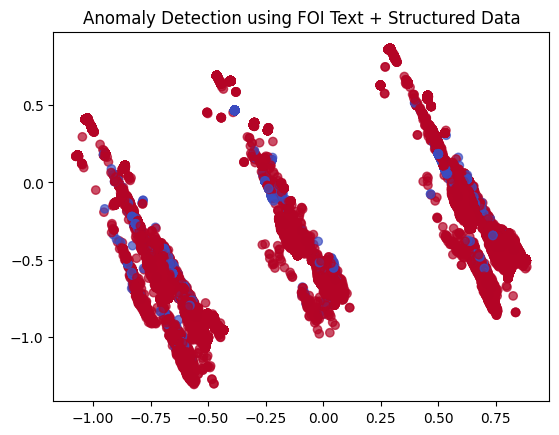

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined.toarray() if hasattr(X_combined, 'toarray') else X_combined)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df['anomaly_score'], cmap='coolwarm', alpha=0.7)
plt.title('Anomaly Detection using FOI Text + Structured Data')
plt.show()

AutoEncoders

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

#model = SentenceTransformer('all-MiniLM-L6-v2')
X_text = np.vstack(df['foi_text'])

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

input_dim = X_text.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_text, X_text, epochs=20, batch_size=32, shuffle=True, validation_split=0.1)

NameError: name 'X_text' is not defined

In [ ]:
reconstructions = autoencoder.predict(X_text)
mse = np.mean(np.square(X_text - reconstructions), axis=1)

threshold = np.percentile(mse, 95)
df['ae_anomaly'] = (mse > threshold).astype(int)